# Código de acompañamiento a la monografía

## Rafael Villca Poggian

### Álgebra Lineal II

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Creamos datos aleatorios en $X_{200\times 2}$

In [2]:
np.random.seed(13)
X = np.dot(np.random.randn(2, 2), np.random.randn(2, 200)).T

Graficando

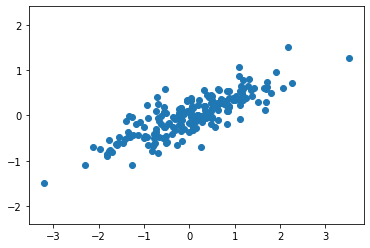

In [3]:
plt.plot(X[:, 0], X[:, 1], 'o')
plt.axis('equal')
plt.show()

# Reducción mediante SVD

Aplicamos la factorización SVD de numpy

In [4]:
U, S_flat, Vt = np.linalg.svd(X)
print(S_flat)
print(U.shape, Vt.shape)

[15.1115431   3.37496493]
(200, 200) (2, 2)


Los vectores singulares derechos

In [5]:
print(Vt)

[[ 0.92722644  0.37450117]
 [ 0.37450117 -0.92722644]]


Construimos $P$ para la reducción de dimensionalidad con SVD

In [6]:
# k=1 la primera colúmna de V o primera fila de Vt
P = Vt[0].reshape(-1, 1)

In [7]:
X_proy = X@P
# Vemos las primeras 5 proyecciones
print(X_proy[:5])

[[-1.8371695 ]
 [ 2.59204892]
 [-0.45831881]
 [-1.69170288]
 [-2.22903719]]


Reconstruimos y graficamos

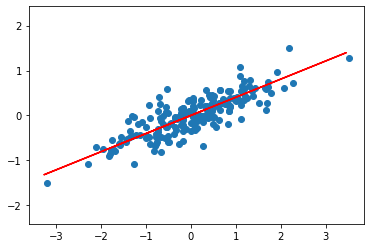

In [8]:
X_k = X_proy@P.T

plt.plot(X[:, 0], X[:, 1], 'o')
plt.plot(X_k[:, 0], X_k[:, 1], 'r')
plt.axis('equal')
plt.show()

Nótese que la línea es distinta a una regresión lineal

# PCA

Usamos primero la implementación de sklearn

In [9]:
from sklearn.decomposition import PCA

In [10]:
pca = PCA(n_components=1)
pca.fit(X)

X_proy_pca = pca.transform(X)
X_k_pca = pca.inverse_transform(X_proy_pca)

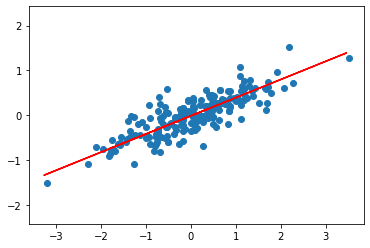

In [11]:
plt.plot(X[:, 0], X[:, 1], 'o')
plt.plot(X_k_pca[:, 0], X_k_pca[:, 1], 'r')
plt.axis('equal')
plt.show()

## Observando los componentes principales

In [12]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

(-3.535034782131204,
 3.847474941978626,
 -1.6498199429451534,
 1.6635799400604063)

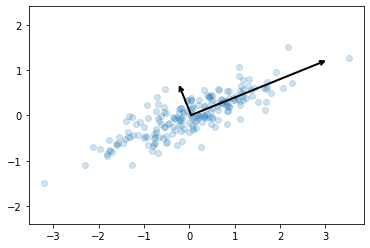

In [13]:
# Obteniendo dos componentes (no se reducela dimensionalidad)
# Esto para tener los vectores singulares y poder graficarlos
pca = PCA(n_components=2)
pca.fit(X)

# Graficando
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal')

In [14]:
pca.explained_variance_

array([1.14586411, 0.05715473])

In [15]:
pca.components_

array([[ 0.92709821,  0.37481851],
       [-0.37481851,  0.92709821]])

In [16]:
Vt

array([[ 0.92722644,  0.37450117],
       [ 0.37450117, -0.92722644]])

# PCA mediante SVD

In [40]:
np.random.seed(10)
# X = np.dot(np.random.randn(3, 3), np.random.randn(3, 200)).T
X = np.dot(np.random.random((3, 3)), np.random.random((3, 200))).T
# Restando la media por colúmnas (Sino los vectores singulares son distintos de SVD y PCA)
X_centrado = (X - np.mean(X, axis=0))

In [41]:
_, D, Vt = np.linalg.svd(X_centrado)
# Las filas de Vt contienen los vectores singulares
print(Vt)

[[ 0.6175395   0.64582912  0.44894288]
 [ 0.6695057  -0.13204703 -0.73097585]
 [ 0.41280392 -0.75197628  0.51393054]]


Proyectando los datos 3D a 2D

In [42]:
# Matriz de proyección (filas de V^T como colúmnas de W)
W = Vt[:2].T
# Los primeros dos valores singulares
D = D[:2]

In [43]:
Z = X_centrado@W
X_tilde = Z@W.T

In [44]:
pca = PCA(n_components=2)
# Como ya está centrada
pca.fit(X)

print(pca.components_)

[[ 0.6175395   0.64582912  0.44894288]
 [-0.6695057   0.13204703  0.73097585]]


Observamos que los componentes principales son los mismos que las primeras dos filas de $V^T$

In [45]:
Z_pca = pca.transform(X)

# Función para comprobar si la proyección del SVD con X centrado es igual al PCA con una tolerancia
# Se usa el valor absoluto poeque a veces los eigenvectores salen en direcciones opuestas debido 
# a los algoritmos de aproximación numérica usados para calcularlos
print(np.allclose(np.abs(Z), np.abs(Z_pca)))

True


Varianza explicada entre implementaciones

In [46]:
print(pca.explained_variance_)

[0.14993981 0.0445114 ]


In [47]:
# Vector colúmna
s = D.reshape(-1, 1)
m = X.shape[0]
C = (s@s.T)/(m-1)

print(np.diag(C))

[0.14993981 0.0445114 ]


Así comprobamos que la teoría se cumple comparando con la implementación de la librería

## Graficando la proyección $\mathbb{R}^3 \to \mathbb{R}^2$

In [48]:
from mpl_toolkits.mplot3d import Axes3D

# Gráficos interactivos en el notebook
%matplotlib notebook

In [49]:
def plot_surf(points, ax):
    x, y, z = points[:, 0].reshape(100, 100), points[:, 1].reshape(100, 100), points[:, 2].reshape(100, 100)       
    ax.plot_surface(x, y, z, rstride=1, cstride=1, alpha=0.6, linewidth=0)

En rojo el subespacio donde se proyectan los puntos azules

<IPython.core.display.Javascript object>


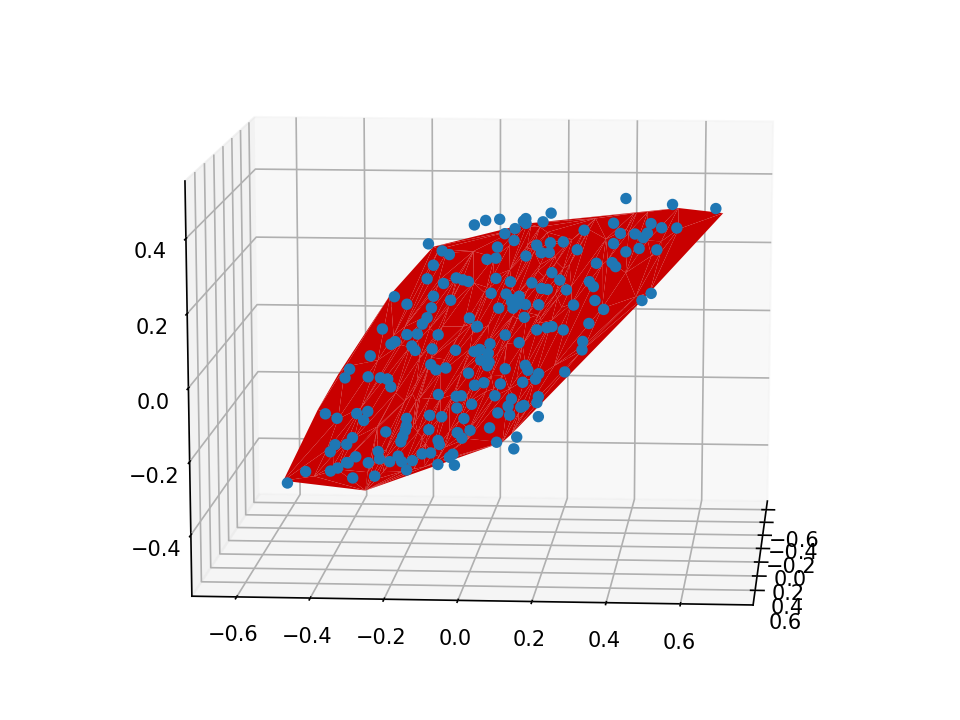

In [71]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X_centrado[:, 0], X_centrado[:, 1], X_centrado[:, 2], alpha=1)

ax.plot_trisurf(X_tilde[:, 0], X_tilde[:, 1], X_tilde[:, 2], color='r', edgecolor='none', antialiased=True)
plt.show()